In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
# Number of Data points to generate = 10, Center defines number of Cluster, feature - dimension
X, _ = make_blobs(n_samples=100, centers=3, n_features=4, random_state=42)

# pandas DataFrame object named df from the data generated earlier using make_blobs
df = pd.DataFrame(X, columns=['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4'])

df.head()

,Feat_1,Feat_2,Feat_3,Feat_4
0,-8.904770,-6.693655,-9.500114,8.175956
1,2.119976,3.388442,-9.563800,9.896195
2,-6.619744,-6.098287,-10.075278,6.003066
3,-6.521840,-6.319325,-7.755277,8.377325
4,2.098105,3.484290,-8.613190,9.251140


In [ ]:
# Define a range of k values to explore
k_range = range(2, 11)

In [ ]:
# Lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

# Iterate over the range of k values
for k in k_range:
    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    # Calculate and store silhouette score
    silhouette_score = metrics.silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_score)

    # Calculate and store inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

print("silhouette_score",silhouette_score)
print("inertia",inertia)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

silhouette_score 0.20907137543542129
inertia 206.68869723322564


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


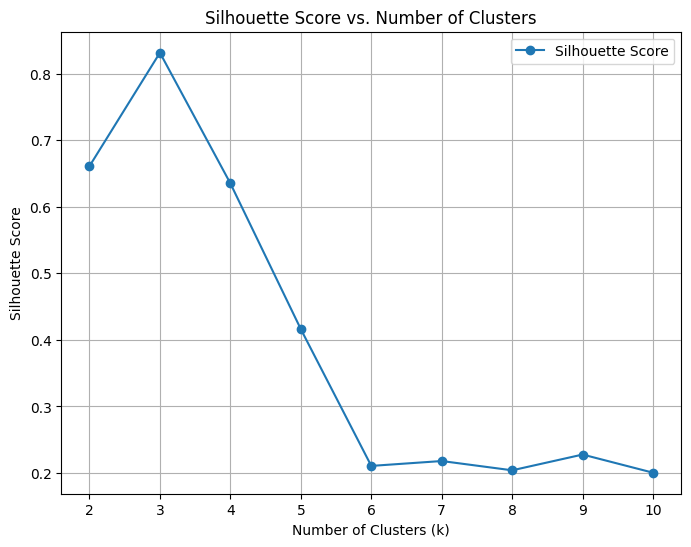

In [ ]:
# Silhouette Score Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

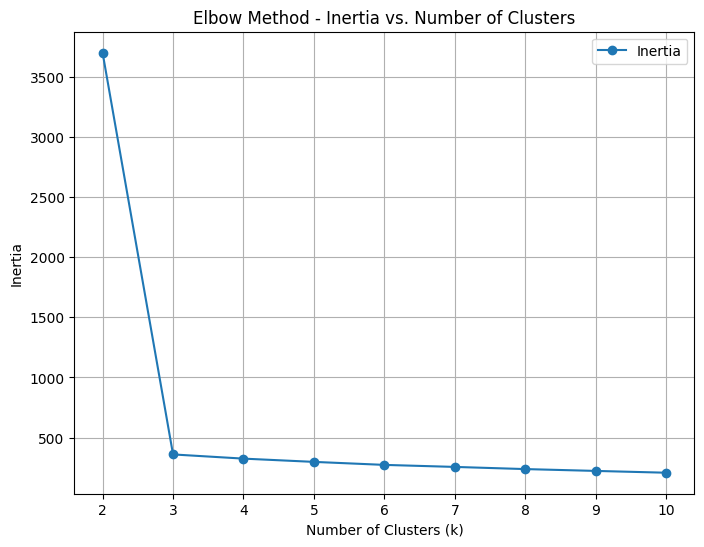

In [ ]:
# Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# KMeans clustering with optimal k value (using elbow method)
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 as range starts from 2
print("Optimal K value:", optimal_k)

Optimal K value: 3


In [ ]:
# KMeans clustering with optimal k value
kmeans_optimal = KMeans(n_clusters=optimal_k)
y_optimal = kmeans_optimal.fit_predict(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Assign cluster labels to DataFrame
df['Cluster'] = y_optimal

In [ ]:
# Print the DataFrame
df.head()

,Feat_1,Feat_2,Feat_3,Feat_4,Cluster
0,-8.904770,-6.693655,-9.500114,8.175956,1
1,2.119976,3.388442,-9.563800,9.896195,2
2,-6.619744,-6.098287,-10.075278,6.003066,1
3,-6.521840,-6.319325,-7.755277,8.377325,1
4,2.098105,3.484290,-8.613190,9.251140,2


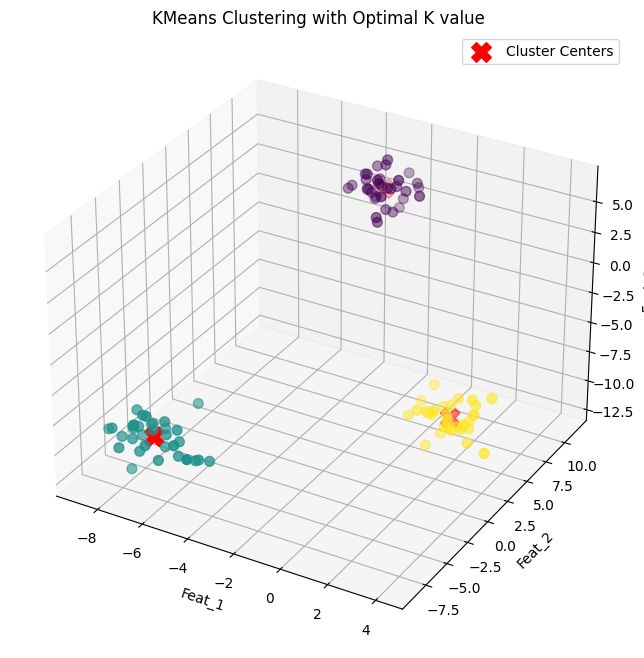

In [ ]:
# Visualize the clustering with optimal k value
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Feat_1'], df['Feat_2'], df['Feat_3'], c=y_optimal, cmap='viridis', s=50)
ax.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], kmeans_optimal.cluster_centers_[:, 2],
           c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Feat_1')
ax.set_ylabel('Feat_2')
ax.set_zlabel('Feat_3')
plt.title('KMeans Clustering with Optimal K value')
plt.legend()
plt.show()